In [1]:
from IPython.display import Image,HTML,IFrame

In [2]:
ls /data/OJ287/Data

bexpmap_00.fits      fit1_02.xml                            OJ287_1deg.fits
bexpmap_01.fits      fit1_03.xml                            OJ287_1deg_gti.fits
bexpmap_02.fits      fit1_04.xml                            OJ287_1deg_lc.fits
bexpmap_03.fits      fit1_counts_map_2.000_5.699.png        OJ287_cmap.fits
bexpmap_04.fits      fit1_counts_map_xproj_2.000_5.699.png  OJ287_filtered.fits
bexpmap_roi_00.fits  fit1_counts_map_yproj_2.000_5.699.png  OJ287_mktime.fits
bexpmap_roi_01.fits  fit1_counts_spectrum.png               PH00.fits
bexpmap_roi_02.fits  fit1.fits                              PH01.fits
bexpmap_roi_03.fits  fit1_model_map_2.000_5.699.png         PH02.fits
bexpmap_roi_04.fits  fit1.npy                               PH03.fits
ccube_00.fits        ft1_00.fits                            PH04.fits
ccube_01.fits        ft1_01.fits                            PH05.fits
ccube_02.fits        ft1_02.fits                            PH06.fits
ccube_03.fits        ft1_03.fits         

In [3]:
from astropy.io import fits as pyfits

In [4]:
sc_hdulist = pyfits.open('/data/OJ287/Data/SC00.fits')

In [5]:
sc_hdulist.info()

Filename: /data/OJ287/Data/SC00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    475   2782899R x 31C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E, 3E]   


In [6]:
sc_data = sc_hdulist[1].data

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


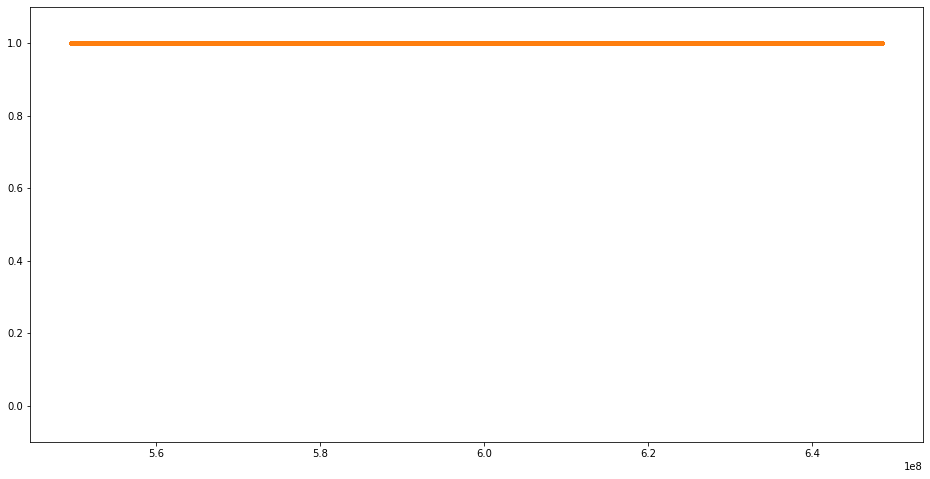

In [8]:
figsize(16,8)
plot(sc_data.field('START'),sc_data.field('DATA_QUAL'),'.')
plot(sc_data.field('START'),sc_data.field('LAT_CONFIG'),'.')
ylim(-0.1,1.1)
show()

In [9]:
%system ls /data/OJ287/Data

['bexpmap_00.fits',
 'bexpmap_01.fits',
 'bexpmap_02.fits',
 'bexpmap_03.fits',
 'bexpmap_04.fits',
 'bexpmap_roi_00.fits',
 'bexpmap_roi_01.fits',
 'bexpmap_roi_02.fits',
 'bexpmap_roi_03.fits',
 'bexpmap_roi_04.fits',
 'ccube_00.fits',
 'ccube_01.fits',
 'ccube_02.fits',
 'ccube_03.fits',
 'ccube_04.fits',
 'ccube.fits',
 'config.yml',
 'events.txt',
 'evfile_00.txt',
 'evfile_01.txt',
 'evfile_02.txt',
 'evfile_03.txt',
 'evfile_04.txt',
 'fermipy.log',
 'fit1_00.xml',
 'fit1_01.xml',
 'fit1_02.xml',
 'fit1_03.xml',
 'fit1_04.xml',
 'fit1_counts_map_2.000_5.699.png',
 'fit1_counts_map_xproj_2.000_5.699.png',
 'fit1_counts_map_yproj_2.000_5.699.png',
 'fit1_counts_spectrum.png',
 'fit1.fits',
 'fit1_model_map_2.000_5.699.png',
 'fit1.npy',
 'ft1_00.fits',
 'ft1_01.fits',
 'ft1_02.fits',
 'ft1_03.fits',
 'ft1_04.fits',
 'gtbin.par',
 'gtexpcube2.par',
 'gtltcube.par',
 'gtmktime.par',
 'gtselect.par',
 'gtsrcmaps.par',
 'ltcube_00.fits',
 'ltcube_01.fits',
 'ltcube_02.fits',
 'ltcube_

In [10]:
%system ls /data/OJ287/Data/*PH* > /data/OJ287/Data/events.txt

[]

In [11]:
%system cat /data/OJ287/Data/events.txt

['/data/OJ287/Data/PH00.fits',
 '/data/OJ287/Data/PH01.fits',
 '/data/OJ287/Data/PH02.fits',
 '/data/OJ287/Data/PH03.fits',
 '/data/OJ287/Data/PH04.fits',
 '/data/OJ287/Data/PH05.fits',
 '/data/OJ287/Data/PH06.fits',
 '/data/OJ287/Data/PH07.fits']

In [12]:
%system gtvcut /data/OJ287/Data/PH00.fits EVENTS

['DSTYP1: TIME',
 'DSUNI1: s',
 'DSVAL1: TABLE',
 'DSREF1: :GTI',
 '',
 'GTIs: (suppressed)',
 '',
 'DSTYP2: BIT_MASK(EVENT_CLASS,128,P8R3)',
 'DSUNI2: DIMENSIONLESS',
 'DSVAL2: 1:1',
 '',
 'DSTYP3: POS(RA,DEC)',
 'DSUNI3: deg',
 'DSVAL3: CIRCLE(133.7036456,20.10851193,30)',
 '',
 'DSTYP4: TIME',
 'DSUNI4: s',
 'DSVAL4: 549560621:648518403',
 '',
 'DSTYP5: ENERGY',
 'DSUNI5: MeV',
 'DSVAL5: 100:500000',
 '']

In [13]:
import gt_apps
from gt_apps import filter
filter.pars()

' infile=@/data/2021_FermiSummerSchool/Data_Exploration/Data/events.txt outfile=/data/2021_FermiSummerSchool/Data_Exploration/Data/3C279_filtered.fits ra=194.0 dec=-5.8 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [14]:
filter['infile'] = '@/data/OJ287/Data/events.txt'
filter['outfile'] = '/data/OJ287/Data/OJ287_filtered.fits'
filter['ra'] = 133.7036456
filter['dec'] = 20.10851193
filter['rad'] = 15
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 500000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3

In [15]:
filter.command()

'time -p gtselect infile=@/data/OJ287/Data/events.txt outfile=/data/OJ287/Data/OJ287_filtered.fits ra=133.7036456 dec=20.10851193 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [16]:
filter.run()

time -p gtselect infile=@/data/OJ287/Data/events.txt outfile=/data/OJ287/Data/OJ287_filtered.fits ra=133.7036456 dec=20.10851193 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 49.82
user 11.12
sys 4.00


In [17]:
filtered_data = pyfits.open('/data/OJ287/Data/OJ287_filtered.fits')

In [18]:
filtered_data.info()

Filename: /data/OJ287/Data/OJ287_filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    222   287208R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   17421R x 2C   [D, D]   


In [19]:
from gt_apps import maketime
maketime['evfile'] = '/data/OJ287/Data/OJ287_filtered.fits'
maketime['outfile'] = '/data/OJ287/Data/OJ287_mktime.fits'
maketime['scfile'] = '/data/OJ287/Data/SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'no'
maketime.run()

time -p gtmktime scfile=/data/OJ287/Data/SC00.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=no evfile=/data/OJ287/Data/OJ287_filtered.fits evtable="EVENTS" outfile="/data/OJ287/Data/OJ287_mktime.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 23.71
user 17.24
sys 0.78


In [20]:
filtered_data.info()

Filename: /data/OJ287/Data/OJ287_filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    222   287208R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   17421R x 2C   [D, D]   


In [21]:
mktime_data = pyfits.open('/data/OJ287/Data/OJ287_mktime.fits')
mktime_data.info()

Filename: /data/OJ287/Data/OJ287_mktime.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    225   287202R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   17422R x 2C   [D, D]   


In [22]:
from fermipy.gtanalysis import GTAnalysis
import yaml
config = yaml.load(open('/data/OJ287/configs.yaml'))
config['model']['galdiff'] = 'gll_iem_v07.fits'
yaml.dump(config, open('new_config.yaml','w'))
gta = GTAnalysis('configs.yaml')

/opt/anaconda/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until
2022-05-17 20:13:08 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8


In [23]:
!tail -n50 data/fermipy.log

  isodiff:
  - iso_P8R3_SOURCE_V3_v1.txt
  limbdiff: []
  merge_sources: true
  sources: []
  src_radius: null
  src_radius_roi: null
  src_roiwidth: 20.0
name: '04'
selection:
  convtype: null
  dec: 20.0657
  emax: 500000.0
  emin: 100.0
  evclass: 128
  evtype: 32
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  glat: null
  glon: null
  logemax: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    YAj2yr7LFkA=
  logemin: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    AAAAAAAAAEA=
  phasemax: null
  phasemin: null
  ra: 85449.7
  radius: 11.106601717798213
  roicut: 'no'
  target: null
  tmax: 648518403
  tmin: 549560621
  zmax: 90.0



In [24]:
gta.setup()

2022-05-17 20:13:09 INFO    GTAnalysis.setup(): Running setup.
2022-05-17 20:13:09 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-05-17 20:13:09 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2022-05-17 20:13:09 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result

In [25]:
opt1 = gta.optimize()

2022-05-17 20:17:37 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', 'isodiff', '4FGL J0854.8+2006']


/opt/anaconda/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J0854.8+2006 TS:  12195.141
Fitting shape galdiff TS:  11687.352
Fitting shape 4FGL J0830.8+2410 TS:   7190.165
Fitting shape 4FGL J0839.4+1803 TS:   2822.826
Fitting shape 4FGL J0836.2+2141 TS:   2444.700
Fitting shape 4FGL J0840.8+1317 TS:   2289.233
Fitting shape 4FGL J0904.0+2724 TS:   2192.206
Fitting shape 4FGL J0812.3+1143 TS:   1647.332
Fitting shape 4FGL J0902.4+2051 TS:   1473.534
Fitting shape 4FGL J0858.1+1405 TS:   1466.065
Fitting shape 4FGL J0803.5+2046 TS:   1274.565
Fitting shape 4FGL J0829.0+1755 TS:   1062.628
Fitting shape isodiff TS:    978.789
Fitting shape 4FGL J0905.6+1358 TS:    809.753
Fitting shape 4FGL J0816.9+2050 TS:    764.100
Fitting shape 4FGL J0824.4+2440 TS:    759.962
Fitting shape 4FGL J0823.3+2224 TS:    744.620
Fitting shape 4FGL J0912.5+1556 TS:    734.962
Fitting shape 4FGL J0819.0+2746 TS:    450.563
Fitting shape 4FGL J0849.5+2710 TS:    422.866
Fitting shape 4FGL J0831.4+2631 TS:    367.042
Fitting shape 4FGL J0910.6+2247 T

2022-05-17 20:19:02 INFO    GTAnalysis.optimize(): Finished
2022-05-17 20:19:02 INFO    GTAnalysis.optimize(): LogLike: -338257.158209 Delta-LogLike: 64122.891972
2022-05-17 20:19:02 INFO    GTAnalysis.optimize(): Execution time: 84.88 s


In [26]:
opt1

{'loglike0': -402380.0501814681,
 'loglike1': -338257.1582090569,
 'dloglike': 64122.89197241119,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [27]:
gta.print_roi()

2022-05-17 20:19:02 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0836.2+2141   PointSource    PowerLaw          1.740   3245.49      5762.9
4FGL J0839.4+1803   PointSource    PowerLaw          2.011   4123.17      6388.7
4FGL J0831.5+1747   PointSource    PowerLaw          2.851     10.92        63.4
4FGL J0829.0+1755   PointSource    PowerLaw          3.138   2229.06      4051.2
4FGL J0854.8+2006   PointSource    LogParabola       3.764   4397.41      4941.4
4FGL J0828.0+2307   PointSource    PowerLaw          3.946      2.85         5.7
4FGL J0823.3+2224   PointSource    PowerLaw          4.290   1124.99      2199.6
4FGL J0856.8+2056   PointSource    PowerLaw          4.306    264.37      1134.3
4FGL J0830.8+2410   PointSource    LogParabola       4.505   1727.86      3853.1
4FGL J0817.1+1955   PointSource    PowerLaw          5.0

In [28]:
gta.delete_sources?

In [29]:
deleted_sources = gta.delete_sources(minmax_ts=[-1,3])

2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0828.0+2307
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0818.4+2816
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0812.6+2821
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0912.2+2800
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0815.9+2951
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0814.4+2941
2022-05-17 20:19:02 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0758.1+1134
2022-05-17 20:19:03 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J0802.0+1006


In [30]:
deleted_sources = gta.delete_sources(minmax_npred=[0,3])

In [31]:
gta.print_roi()

2022-05-17 20:19:03 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0836.2+2141   PointSource    PowerLaw          1.740   3245.49      5762.9
4FGL J0839.4+1803   PointSource    PowerLaw          2.011   4123.17      6388.7
4FGL J0831.5+1747   PointSource    PowerLaw          2.851     10.92        63.4
4FGL J0829.0+1755   PointSource    PowerLaw          3.138   2229.06      4051.2
4FGL J0854.8+2006   PointSource    LogParabola       3.764   4397.41      4941.4
4FGL J0823.3+2224   PointSource    PowerLaw          4.290   1124.99      2199.6
4FGL J0856.8+2056   PointSource    PowerLaw          4.306    264.37      1134.3
4FGL J0830.8+2410   PointSource    LogParabola       4.505   1727.86      3853.1
4FGL J0817.1+1955   PointSource    PowerLaw          5.097      7.20        60.5
4FGL J0837.3+1458   PointSource    PowerLaw          5.1

In [38]:
# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 10
gta.free_sources(minmax_ts=[10,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

2022-05-17 20:21:34 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Index']


In [39]:
fit1 = gta.fit()

2022-05-17 20:21:45 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-05-17 20:24:35 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   2 Status:   1
2022-05-17 20:24:35 INFO    GTAnalysis.fit(): LogLike:  -336016.521 DeltaLogLike:        3.432 


In [40]:
gta.print_roi()

2022-05-17 20:24:54 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0836.2+2141   PointSource    PowerLaw          1.740   3322.95      5416.4
4FGL J0839.4+1803   PointSource    PowerLaw          2.011   2425.95      4270.0
4FGL J0831.5+1747   PointSource    PowerLaw          2.851     26.47       169.5
4FGL J0829.0+1755   PointSource    PowerLaw          3.138   3153.91      5045.2
4FGL J0854.8+2006   PointSource    LogParabola       3.764   6619.99      7082.4
4FGL J0823.3+2224   PointSource    PowerLaw          4.290    881.18      1952.7
4FGL J0856.8+2056   PointSource    PowerLaw          4.306    241.84      1228.3
4FGL J0830.8+2410   PointSource    LogParabola       4.505   1388.63      3081.6
4FGL J0817.1+1955   PointSource    PowerLaw          5.097      7.20        60.5
4FGL J0837.3+1458   PointSource    PowerLaw          5.1

In [41]:
print(gta.roi['4FGL J0854.8+2006'])

Name           : 4FGL J0854.8+2006
Associations   : ['4FGL J0854.8+2006', 'OJ 287', '3EG J0853+1941']
RA/DEC         :    133.707/    20.116
GLON/GLAT      :    206.805/    35.826
TS             : 6619.99
Npred          : 7082.36
Flux           : 1.394e-07 +/- 3.34e-09
EnergyFlux     : 4.919e-05 +/- 1.18e-06
SpatialModel   : PointSource
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.925e-11 +/-  7.014e-13
b'alpha'       :      2.307 +/-        nan
b'beta'        :    0.06132 +/-        nan
b'Eb'          :        627 +/-        nan


2022-05-17 20:25:05 INFO    GTBinnedAnalysis.write_xml(): Writing /data/OJ287/data/fit1_00.xml...
2022-05-17 20:25:05 INFO    GTBinnedAnalysis.write_xml(): Writing /data/OJ287/data/fit1_01.xml...
2022-05-17 20:25:05 INFO    GTBinnedAnalysis.write_xml(): Writing /data/OJ287/data/fit1_02.xml...
2022-05-17 20:25:05 INFO    GTBinnedAnalysis.write_xml(): Writing /data/OJ287/data/fit1_03.xml...
2022-05-17 20:25:05 INFO    GTBinnedAnalysis.write_xml(): Writing /data/OJ287/data/fit1_04.xml...
2022-05-17 20:25:06 INFO    GTAnalysis.write_fits(): Writing /data/OJ287/data/fit1.fits...
2022-05-17 20:25:30 INFO    GTAnalysis.write_roi(): Writing /data/OJ287/data/fit1.npy...


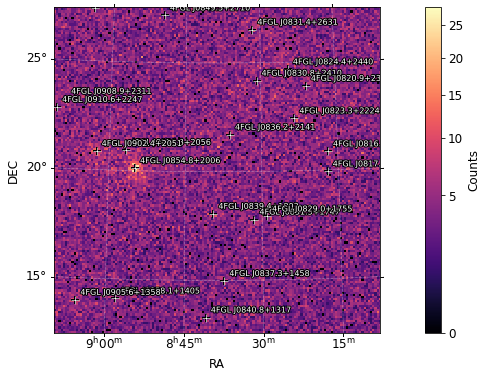

In [42]:
gta.write_roi('fit1',make_plots=True)

In [43]:
ls data/*.png

data/fit1_counts_map_2.000_5.699.png        data/fit1_counts_spectrum.png
data/fit1_counts_map_xproj_2.000_5.699.png  data/fit1_model_map_2.000_5.699.png
data/fit1_counts_map_yproj_2.000_5.699.png


In [44]:
fixed_sources = gta.free_sources(free=False)

2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0836.2+2141     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0839.4+1803     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0831.5+1747     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0829.0+1755     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0854.8+2006     : ['norm']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0823.3+2224     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0856.8+2056     : ['Prefactor']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0830.8+2410     : ['norm']
2022-05-17 20:31:57 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0837.3+1458     

In [48]:
resid = gta.residmap('OJ 287',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2022-05-17 20:34:02 INFO    GTAnalysis.residmap(): Generating residual maps
2022-05-17 20:34:02 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2022-05-17 20:34:17 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2022-05-17 20:34:20 INFO    GTAnalysis.residmap(): Finished residual maps
2022-05-17 20:34:35 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/OJ287/data/OJ 287_pointsource_powerlaw_2.00_residmap.npy
2022-05-17 20:34:35 INFO    GTAnalysis.residmap(): Execution time: 33.37 s


In [46]:
from fermipy.plotting import ROIPlotter

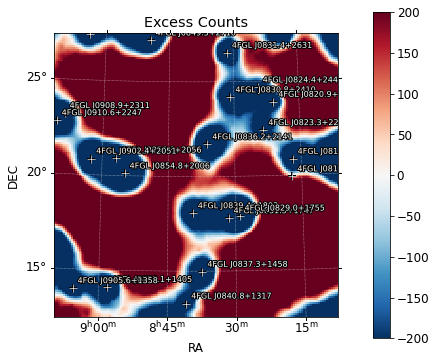

In [49]:
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')
plt.show()

In [51]:
resid_noj1322 = gta.residmap('OJ 287 noj1322',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J0902.4+2051'])

2022-05-17 20:36:38 INFO    GTAnalysis.residmap(): Generating residual maps
2022-05-17 20:36:38 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2022-05-17 20:36:53 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2022-05-17 20:36:55 INFO    GTAnalysis.residmap(): Finished residual maps
2022-05-17 20:37:10 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/OJ287/data/OJ 287 noj1322_pointsource_powerlaw_2.00_residmap.npy
2022-05-17 20:37:10 INFO    GTAnalysis.residmap(): Execution time: 32.78 s


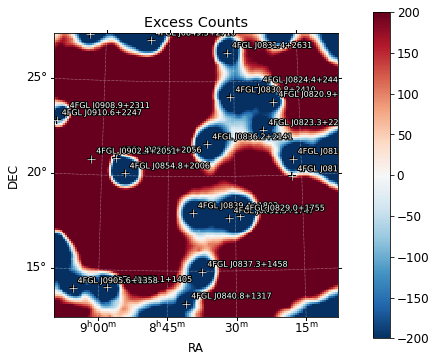

In [52]:
o = resid_noj1322
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')
plt.show()

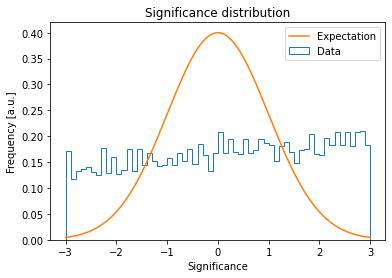

In [53]:
%matplotlib inline
n, _, _ = plt.hist( resid["sigma"].data.flatten(), bins=np.linspace(-3,3,61), \
                            density=True, histtype="step", label = "Data"  )
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x = np.linspace(-3,3, 601)
y = np.exp(-x**2 / 2.0) #gaussian with mean 0 and width 1
norm = n.sum() * 0.1 / (y.sum() * 0.01) #norm factor
plt.plot(x, norm*y, label = "Expectation")
plt.xlabel("Significance")
plt.ylabel("Frequency [a.u.]")
plt.title("Significance distribution")
plt.legend()

In [54]:
tsmap = gta.tsmap('OJ 287',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2022-05-17 20:40:34 INFO    GTAnalysis.tsmap(): Generating TS map
2022-05-17 20:40:56 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2022-05-17 20:43:05 INFO    GTAnalysis.tsmap(): Finished TS map
2022-05-17 20:43:23 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/OJ287/data/OJ 287_pointsource_powerlaw_2.00_tsmap.npy
2022-05-17 20:43:23 INFO    GTAnalysis.tsmap(): Execution time: 168.98 s


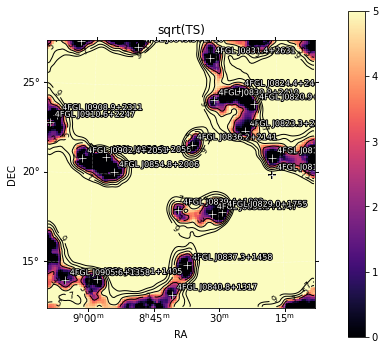

In [55]:
o = tsmap

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

In [56]:
# Generate a lightcurve with 1-week binning
lc = gta.lightcurve('OJ 287', binsz=86400.*7.0, free_radius = 3.0)

2022-05-17 20:47:37 INFO    GTAnalysis.lightcurve(): Computing Lightcurve for 4FGL J0854.8+2006
2022-05-17 20:47:41 INFO    lightcurve_549560621_550165421 GTAnalysis._process_lc_bin(): Fitting time range 549560621 550165421
2022-05-17 20:47:42 INFO    lightcurve_549560621_550165421 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

Analysis failed in time range 549560621 550165421
<class 'FileNotFoundError'>


KeyError: 'fit_success'